<a href="https://colab.research.google.com/github/ua-datalab/GraphML/blob/main/04_08_GraphML_Lecture02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial 2**

# **Creating Node Representations with Node representations: Deepwalk and node2vec**

___

 ## **Introduction**
 ### Unlike traditional neural networks that often deal with structured, grid-like data (such as images in convolutional neural networks or sequential data in recurrent neural networks), GNNs are designed to work with graph data. This includes social networks, molecular structures, and any other form of data that can be represented as a graph consisting of nodes and edges.

 ### The core functionality of GNNs revolves around embeddings, which are dense vector representations of the nodes (and sometimes edges) in a graph. These embeddings are crucial for capturing the complex relationships and patterns within the graph structure.

## **Embedding Nodes**

## The goal of node embedding is to encode nodes so that similarity in the embedding space (e.g., dot product) approximates similarity in the original network.

![link text](https://snap-stanford.github.io/cs224w-notes/assets/img/node_embeddings.png?style=centerme)

## **DeepWalk**

* DeepWalk is an algorithm that generates embeddings for nodes in a graph by
treating random walks through the graph as sentences, analogous to sequences of words in natural language.

* It utilizes techniques from Word2Vec, specifically the Skip-Gram model, to learn these embeddings in a way that captures the structural similarities between nodes.

### Understading **word2vec**
### Word2Vec operates under the premise that words can be converted into vectors in such a way that these vectors capture the semantic relationships between the words.

![w2v](https://www.usna.edu/Users/cs/nchamber/courses/nlp/f20/labs/lab5/wordgraph.png)

## **Word2Vec and the Skip-Gram Model:**

**Step 1: Initialize Word Embeddings**
Word2Vec begins by assigning random vectors to each word in the vocabulary. These vectors have a specified dimensionality (e.g., 100 or 300 dimensions), and this initial assignment is the starting point for learning the word embeddings.

**Step 2: Define the Context of a Word**
The core idea of Word2Vec, particularly in the Skip-Gram model, is to predict the context of a word within a sentence. The "context" refers to the words surrounding a target word within a defined window size. For instance, in the sentence "The cat sat on the mat," with a window size of 2, the context for "sat" includes "The," "cat," "on," and "the."

**Step 3: Generate Training Samples**
For each word in the corpus, training samples are created based on its context. Using the same example and target word "sat," one training sample would be ("sat", "The"), another would be ("sat", "cat"), and so on, covering all words within the window size.

**Step 4: Use Skip-Gram to Predict Context Words**
The Skip-Gram model then takes each target word and tries to predict its context words. It does this by using the target word's vector and calculating the probability of each context word given the target word. The objective is to adjust the word vectors to maximize the likelihood of the observed context words.

**Step 5: Optimize the Model**
This optimization is typically achieved through techniques such as stochastic gradient descent, where the model's parameters (i.e., the word vectors) are iteratively adjusted to reduce the difference between the predicted probabilities and the actual occurrences of context words.

**Step 6: Iterate Over the Corpus**
The model iterates over the entire text corpus, continuously updating the word vectors based on the prediction errors made in the context prediction task. This iterative process allows the vectors to gradually align in a way that words with similar contexts—and thus, presumably, similar meanings—are closer together in the vector space.

**Step 7: Finalize the Word Embeddings**
After sufficient iterations over the corpus, the training process concludes, and the resultant word vectors are used as the embeddings. These embeddings capture the semantic relationships between words, as words appearing in similar contexts have been pushed closer in the vector space.

In [1]:
import numpy as np

In [2]:
context_size = 2

In [5]:
raw_text = """
The universe is a vast, mysterious expanse that has fascinated humanity throughout history.
It is the sum of all space, time, matter, and energy that exists.
From the smallest subatomic particles to the largest galaxies, everything is included within the boundaries of the universe.
At the heart of our understanding of the universe is the Big Bang theory, which posits that the universe began as an incredibly hot, dense point approximately 13.8 billion years ago.
Since then, it has been expanding and cooling, leading to the formation of all the celestial bodies and phenomena we observe today.
This expansion is not just a spreading out of galaxies in space, but an expansion of space itself.
One of the most compelling aspects of the universe is its sheer scale.
It contains billions of galaxies, each with billions of stars.
Our own galaxy, the Milky Way, is just one of these, and our solar system is but a tiny speck within it.
The distances involved are so vast that we measure them not in kilometers or miles, but in light-years, the distance light travels in a year.
"""

In [6]:
len(raw_text)

1086

In [7]:
text = raw_text.split()

In [8]:
len(text)

185

### **setup skipgrams**

In [9]:
skipgrams = []

for i in range(context_size, len(text) - context_size):
    array = [text[j] for j in np.arange(i - context_size, i+context_size+1) if j!=i]

    skipgrams.append((text[i], array))

In [10]:
len(skipgrams)

181

In [11]:
skipgrams[0:20]

[('is', ['The', 'universe', 'a', 'vast,']),
 ('a', ['universe', 'is', 'vast,', 'mysterious']),
 ('vast,', ['is', 'a', 'mysterious', 'expanse']),
 ('mysterious', ['a', 'vast,', 'expanse', 'that']),
 ('expanse', ['vast,', 'mysterious', 'that', 'has']),
 ('that', ['mysterious', 'expanse', 'has', 'fascinated']),
 ('has', ['expanse', 'that', 'fascinated', 'humanity']),
 ('fascinated', ['that', 'has', 'humanity', 'throughout']),
 ('humanity', ['has', 'fascinated', 'throughout', 'history.']),
 ('throughout', ['fascinated', 'humanity', 'history.', 'It']),
 ('history.', ['humanity', 'throughout', 'It', 'is']),
 ('It', ['throughout', 'history.', 'is', 'the']),
 ('is', ['history.', 'It', 'the', 'sum']),
 ('the', ['It', 'is', 'sum', 'of']),
 ('sum', ['is', 'the', 'of', 'all']),
 ('of', ['the', 'sum', 'all', 'space,']),
 ('all', ['sum', 'of', 'space,', 'time,']),
 ('space,', ['of', 'all', 'time,', 'matter,']),
 ('time,', ['all', 'space,', 'matter,', 'and']),
 ('matter,', ['space,', 'time,', 'and', 

### **vocabulary**

In [13]:
vocab = set(text)

In [14]:
vocab_size = len(vocab)

In [15]:
vocab_size

121

#### setting hyperparameter N which is the size of our embedding

In [16]:
N = 10

In [17]:
##using gensim

from gensim.models.word2vec import Word2Vec

In [18]:
w2vmodel = Word2Vec([text], sg=1, vector_size=10, min_count=0, window=2, workers=2, seed=0)

In [19]:
print(f'Shape of W_embed: {w2vmodel.wv.vectors.shape}')

Shape of W_embed: (121, 10)


In [20]:
w2vmodel.train([text], total_examples=w2vmodel.corpus_count, epochs=10)

(814, 1850)

In [21]:
# Print a word embedding
print('\nWord embedding =')
print(w2vmodel.wv[0])


Word embedding =
[ 0.0772095   0.03803322  0.00351008 -0.04791011 -0.03378131 -0.08152346
 -0.09893063 -0.10029946 -0.06052757  0.07040983]


In [25]:
w2vmodel.wv[120]

array([ 0.02615517, -0.09506933, -0.02553919,  0.04415054,  0.0944408 ,
        0.04038959, -0.08063466,  0.02976703,  0.04487184,  0.04045306],
      dtype=float32)

## **DeepWalk**
### GOAL: Nodes that are close in the graph have are similar embeddings

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(0)

In [73]:
G_er = nx.erdos_renyi_graph(20, 0.2, seed=1, directed=False)

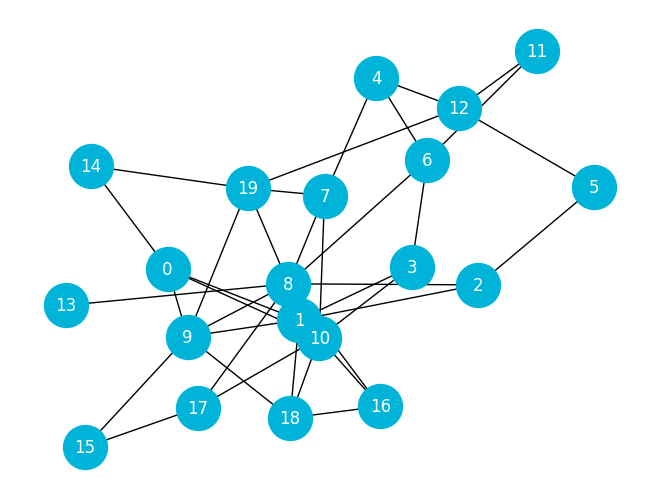

In [74]:
nx.draw(G_er, with_labels=True, font_color='#ffffff', node_size=1000, node_color="#00b4d9",pos=nx.spring_layout(G_er, seed=1))

## **define a random walk**

In [75]:
def random_walk(G, start,length):
    walk = [str(start)]

    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node


    return walk

In [76]:
random_walk(G_er, 0, 10)

['0', '9', '18', '1', '3', '6', '3', '10', '7', '8', '6']

In [77]:
walks = []

for node in G_er.nodes:
    for _ in range(80):
        walks.append(random_walk(G_er, node, 10))

In [78]:
walks[:20]

[['0', '9', '18', '9', '1', '18', '16', '8', '2', '8', '13'],
 ['0', '9', '15', '17', '10', '17', '8', '2', '8', '9', '18'],
 ['0', '1', '18', '10', '7', '19', '9', '1', '9', '8', '6'],
 ['0', '10', '16', '8', '13', '8', '2', '8', '2', '5', '2'],
 ['0', '10', '8', '16', '10', '17', '8', '7', '4', '12', '5'],
 ['0', '9', '19', '8', '7', '19', '9', '19', '14', '19', '8'],
 ['0', '1', '0', '1', '3', '1', '3', '6', '11', '12', '4'],
 ['0', '10', '8', '7', '4', '12', '4', '6', '3', '6', '11'],
 ['0', '9', '1', '9', '18', '1', '2', '1', '3', '10', '7'],
 ['0', '9', '8', '16', '18', '16', '10', '18', '16', '18', '10'],
 ['0', '10', '18', '9', '0', '10', '17', '15', '17', '10', '17'],
 ['0', '14', '19', '12', '11', '12', '4', '7', '4', '12', '4'],
 ['0', '10', '18', '9', '8', '9', '19', '14', '0', '9', '19'],
 ['0', '10', '3', '1', '3', '10', '16', '10', '0', '9', '1'],
 ['0', '10', '8', '19', '14', '19', '9', '1', '9', '0', '9'],
 ['0', '9', '8', '19', '9', '19', '8', '2', '1', '9', '18'],
 [

**now implement Word2vec on the random walks**

In [79]:
model = Word2Vec(walks,
                 sg=1,   # Skip-gram
                 vector_size=1000,
                 window=10,
                 workers=1,
                 seed=1)

print(f'Shape of embedding matrix: {model.wv.vectors.shape}')

Shape of embedding matrix: (20, 1000)


In [80]:
# Build vocabulary
model.build_vocab(walks)

# Train model
model.train(walks, total_examples=model.corpus_count, epochs=100, report_delay=1)

(278255, 1760000)

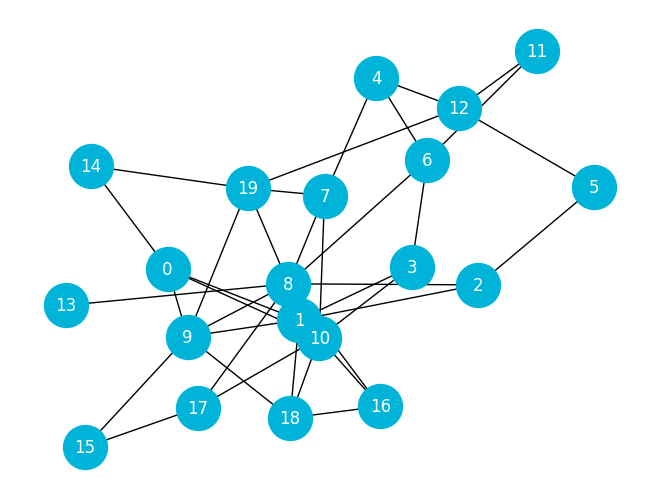

In [81]:
nx.draw(G_er, with_labels=True, font_color='#ffffff', node_size=1000, node_color="#00b4d9",pos=nx.spring_layout(G_er, seed=1))

In [89]:
# Most similar nodes
print('Nodes that are the most similar to node 15:')
for similarity in model.wv.most_similar(positive=['15']):
    print(f'   {similarity}')

Nodes that are the most similar to node 15:
   ('17', 0.6526773571968079)
   ('9', 0.5152590870857239)
   ('10', 0.4304952323436737)
   ('0', 0.42807304859161377)
   ('8', 0.40899768471717834)
   ('18', 0.37304723262786865)
   ('13', 0.32155078649520874)
   ('1', 0.3060050904750824)
   ('19', 0.3051372170448303)
   ('16', 0.2938670217990875)


### **lets'see the zachary karate club from the previous tutorial**

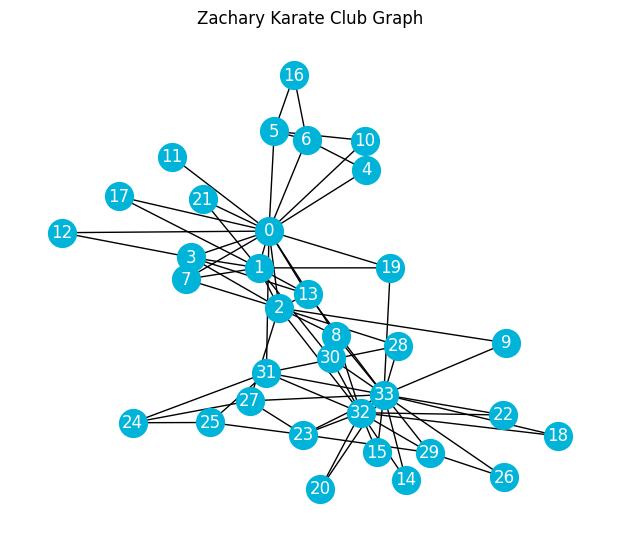

In [90]:
# Karate Club Graph
G_karate = nx.karate_club_graph()
plt.figure(figsize=(6, 5))
pos_G=nx.spring_layout(G_karate, seed=0)
nx.draw(G_karate, with_labels=True, font_color='#ffffff', node_size=400, node_color="#00b4d9", pos=pos_G)
plt.title("Zachary Karate Club Graph")
plt.show()

## **extract labels from the graph**

In [91]:
labels = []

for node in G_karate.nodes:
    label = G_karate.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

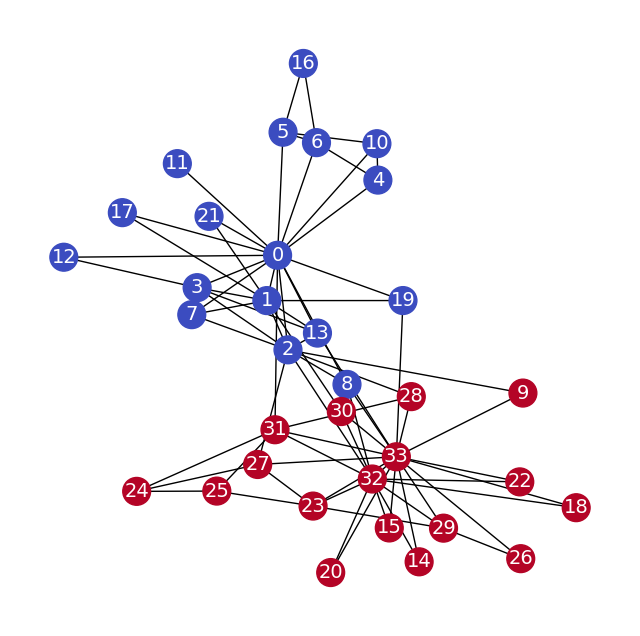

In [92]:
plt.figure(figsize=(8,8))
plt.axis('off')

nx.draw_networkx(G_karate, pos=pos_G, node_color=labels, node_size=400, font_size=14, font_color='white', cmap='coolwarm')
plt.show()

In [93]:
walks = []

for node in G_karate.nodes:
    for _ in range(80):
        walks.append(random_walk(G_karate, node, 20))

In [94]:
print(walks[0])

['0', '12', '3', '13', '3', '12', '3', '0', '12', '0', '13', '1', '13', '3', '12', '0', '7', '1', '30', '32', '31']


In [95]:
model = Word2Vec(walks,
                 sg=1,   # Skip-gram
                 vector_size=1000,
                 window=10,
                 workers=1,
                 seed=1)

print(f'Shape of embedding matrix: {model.wv.vectors.shape}')

Shape of embedding matrix: (34, 1000)


In [96]:
# Build vocabulary
model.build_vocab(walks)

# Train model
model.train(walks, total_examples=model.corpus_count, epochs=100, report_delay=1)

(1187850, 5712000)

In [105]:
# Most similar nodes
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'   {similarity}')

Nodes that are the most similar to node 0:
   ('4', 0.7487812638282776)
   ('10', 0.7235748767852783)
   ('6', 0.7022271752357483)
   ('16', 0.7018098831176758)
   ('5', 0.691774845123291)
   ('7', 0.6748601198196411)
   ('21', 0.6649255156517029)
   ('17', 0.6645292639732361)
   ('12', 0.6300284266471863)
   ('1', 0.6247439980506897)


### since the embedding size is 1000 we can reduce the dimension using t-sne and plot it in 2D

In [98]:
from sklearn.manifold import TSNE

In [126]:
# Preprocess word vectors and label
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

# Train TSNE
tsne = TSNE(n_components=2,
            learning_rate='auto',
            perplexity=8,
            random_state=0).fit_transform(nodes_wv)



In [127]:
node_text = list(range(0,34))

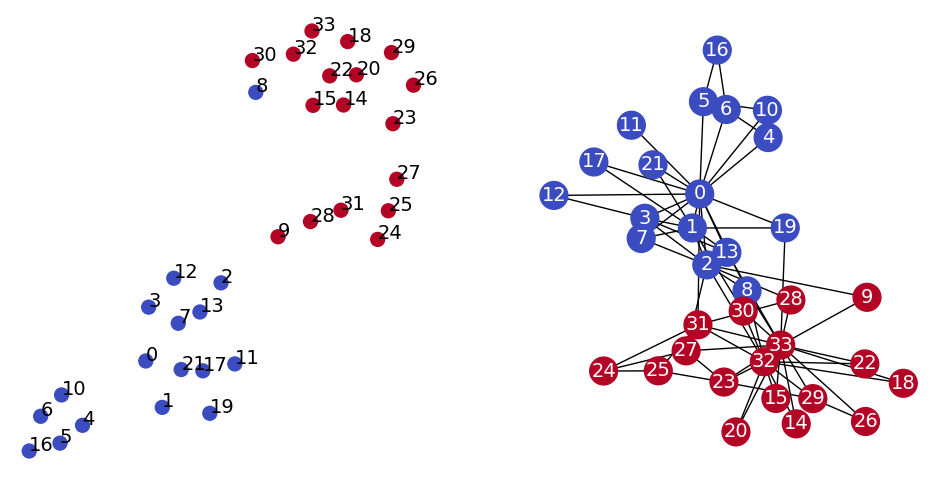

In [128]:
# Plot TSNE

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels, cmap="coolwarm")
for i, (x, y) in enumerate(tsne):

    plt.text(x, y, str(node_text[i]), color='black', fontsize=14)

plt.subplot(1, 2, 2)
plt.axis('off')

nx.draw_networkx(G_karate, pos=pos_G, node_color=labels, node_size=400, font_size=14, font_color='white', cmap='coolwarm')
plt.show()

## **Given that we have learned embeddings and labels, we can train a classifier**

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### **Create masks to train and test the model**

In [130]:
train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]

In [133]:
# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(nodes_wv[train_mask], labels[train_mask])

RandomForestClassifier(random_state=42)

In [134]:
# Evaluate accuracy
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(y_pred, labels[test_mask])
print(f'Accuracy = {acc*100:.2f}%')

Accuracy = 90.91%


## **Node2Vec**

### Node2Vec, evolves from the foundational concepts of DeepWalk, incorporating random walks and Word2Vec by introducing bias into random walks to efficiently capture a broader notion of node neighborhoods in graphs.

### This adjustment allows Node2Vec to generate more informative node embeddings that reflect the complex structure of the network

## **Defining a Neighborhood with Flexibility**

Node2Vec posits that both BFS and DFS capture valuable, albeit different, aspects of the network's structure—

* BFS highlights structural equivalence (nodes sharing many neighbors are similar), while

* DFS explores broader network properties, challenging the conventional wisdom that only immediate neighbors define a node's context.

The essence of Node2Vec's innovation is in biasing the random walks to mimic either BFS or DFS, or a balance of both. This biasing is achieved through two parameters:

* Return parameter (p): Influences the walk's likelihood to revisit the immediate previous node, encouraging exploration of new areas (akin to DFS).

* In-out parameter (q): Governs the walk's propensity to explore nodes close to the previous node, mirroring a BFS-like behavior.

### Determine the next node to visit in the random walk given the current and previous nodes.

In [136]:
def next_node(G, previous, current, p,q):

    neighbors = list(G.neighbors(current))
    alphas = []

    for neighbor in neighbors:
        if neighbor == previous:
            alpha = 1/p
            ### p: Return parameter influencing the probability of revisiting the previous node.
        elif G.has_edge(neighbor, previous):
            alpha = 1
        else:
            alpha = 1/q
            ### q: In-out parameter affecting the exploration of the graph away from the previous node.

        alphas.append(alpha)

    probs = [alpha / sum(alphas) for alpha in alphas]

    next = np.random.choice(neighbors, size=1, p=probs)[0]

    return next

## **Random Walk**

In [138]:
def random_walk(G, start, length, p, q):
    walk = [start]

    for i in range(length):
        current = walk[-1]

        previous = walk[-2] if len(walk) > 1 else None

        next = next_node(G, previous, current, p, q)


        walk.append(next)

    return [str(x) for x in walk]

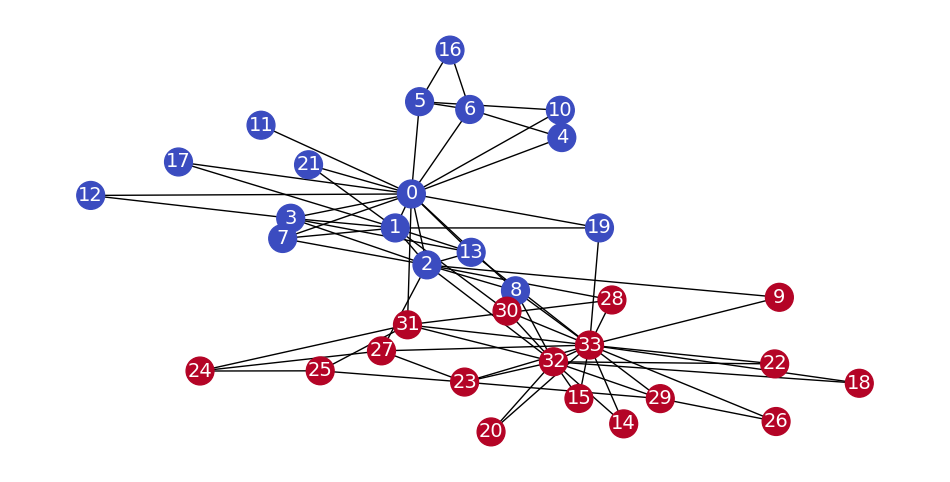

In [139]:
plt.figure(figsize=(12, 6))
plt.axis('off')
nx.draw_networkx(G_karate, pos=pos_G, node_color=labels, node_size=400, font_size=14, font_color='white', cmap='coolwarm')
plt.show()

In [142]:
print(random_walk(G_karate, 0, 20, p=1, q=1))

['0', '2', '7', '3', '7', '0', '12', '0', '4', '0', '5', '10', '4', '0', '3', '1', '19', '0', '12', '3', '1']


In [143]:
print(random_walk(G_karate, 0, 20, p=1, q=10))

['0', '13', '2', '0', '2', '3', '13', '3', '2', '0', '13', '2', '3', '2', '3', '2', '7', '2', '1', '2', '1']


In [144]:
print(random_walk(G_karate, 0, 20, p=10, q=1))

['0', '13', '1', '0', '21', '1', '17', '0', '21', '1', '0', '19', '33', '13', '0', '12', '3', '1', '19', '0', '4']


In [145]:
print(random_walk(G_karate, 0, 20, p=10, q=10))

['0', '3', '2', '13', '3', '2', '8', '32', '2', '13', '1', '3', '2', '9', '2', '13', '0', '1', '17', '0', '12']


| \(p\) / \(q\) | High \(p\)                                        | Low \(p\)                                         |
|---------------|---------------------------------------------------|---------------------------------------------------|
| **High \(q\)**| Discouraged from returning to the previous node;  | More likely to oscillate back and forth between   |
|               | biased towards exploring the local neighborhood.  | a few nodes, focusing on very local structure.    |
| **Low \(q\)** | Tends to explore more distant parts of the graph, | Encourages rapid exploration away from the        |
|               | capturing the graph's global structure.           | starting point, potentially overlooking local     |
|               |                                                   | structures.                                       |


In [147]:
walks = []

for node in G_karate.nodes:
    for _ in range(80):
        walks.append(random_walk(G_karate, node, 10, 3, 2))


In [148]:

# Create and train Word2Vec for DeepWalk
node2vec = Word2Vec(walks,
                sg=1,   # Skip-gram
                vector_size=100,
                window=10,
                workers=2,
                min_count=1,
                seed=0)

In [149]:
node2vec.train(walks, total_examples=node2vec.corpus_count, epochs=30, report_delay=1)

(185998, 897600)

In [154]:
# Most similar nodes
print('Nodes that are the most similar to node 0:')
for similarity in node2vec.wv.most_similar(positive=['0']):
    print(f'   {similarity}')

Nodes that are the most similar to node 0:
   ('10', 0.7242435812950134)
   ('4', 0.7227914333343506)
   ('11', 0.7068590521812439)
   ('21', 0.7001959681510925)
   ('5', 0.6861693859100342)
   ('3', 0.6580827832221985)
   ('6', 0.6570806503295898)
   ('7', 0.65390545129776)
   ('1', 0.6532688736915588)
   ('17', 0.6428243517875671)


**since the embedding size is 1000 we can reduce the dimension using t-sne and plot it in 2D**

In [155]:
# Preprocess word vectors and label
node2vec_wv = np.array([node2vec.wv.get_vector(str(i)) for i in range(len(node2vec.wv))])
labels = np.array(labels)

# Train TSNE
node2vec_tsne = TSNE(n_components=2,
            learning_rate='auto',
            perplexity=8,
            random_state=0).fit_transform(node2vec_wv)

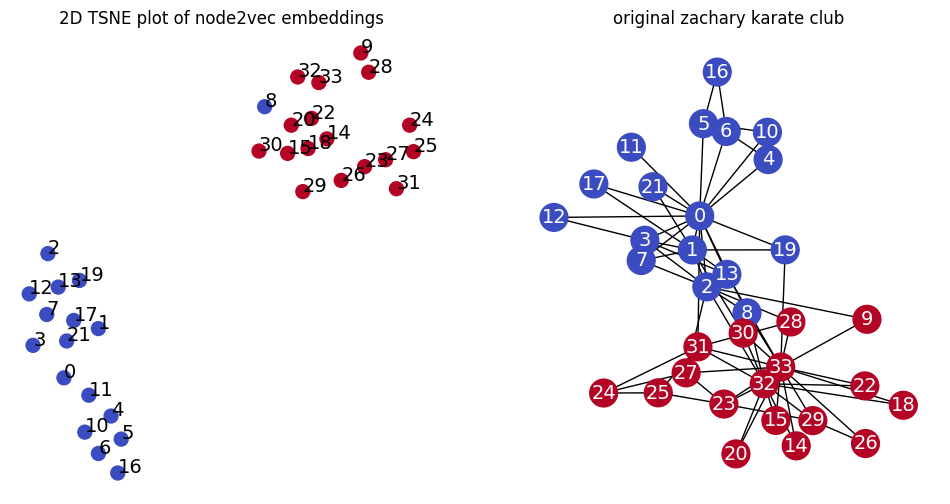

In [159]:
# Plot TSNE

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('2D TSNE plot of node2vec embeddings')
plt.axis('off')
plt.scatter(node2vec_tsne[:, 0], node2vec_tsne[:, 1], s=100, c=labels, cmap="coolwarm")
for i, (x, y) in enumerate(node2vec_tsne):

    plt.text(x, y, str(node_text[i]), color='black', fontsize=14)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('original zachary karate club')
nx.draw_networkx(G_karate, pos=pos_G, node_color=labels, node_size=400, font_size=14, font_color='white', cmap='coolwarm')
plt.show()

In [160]:
# Create masks to train and test the model
train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24] ## same as done in deepwalk
train_mask_str = [str(x) for x in train_mask]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]  ## same as done in deepwalk
test_mask_str = [str(x) for x in test_mask]
labels = np.array(labels)

## **create a node2vec classifier based on Random Forest**

In [161]:
# Train Node2Vec classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(node2vec.wv[train_mask_str], labels[train_mask])

RandomForestClassifier(random_state=0)

In [162]:
# Evaluate accuracy
y_pred = clf.predict(node2vec.wv[test_mask_str])
acc = accuracy_score(y_pred, labels[test_mask])
print(f'Node2Vec accuracy = {acc*100:.2f}%')

Node2Vec accuracy = 95.45%


### **through deepwalk we got 90% accuracy and node2vec: 95.45% accuracy**



---



## **Applications: A movie recommender system**

In [163]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [164]:
import pandas as pd

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [165]:
movies = pd.read_csv('ml-100k/u.item', sep='|', usecols=range(2), names=['movie_id', 'title'], encoding='latin-1')
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


## **How to build a graph from this information?**


* To establish the connectivity between movies, we'll examine the ratings given by users. If two movies have been rated positively by the same user, we'll create an edge between them, indicating a connection based on shared appreciation.

* This approach allows us to construct a network where movies are interconnected based on user preferences, revealing patterns and relationships within the dataset.

In [166]:
# Only consider ratings with the highest score
ratings = ratings[ratings.rating >= 4]
ratings

,user_id,movie_id,rating,unix_timestamp
5,298,474,4,884182806
7,253,465,5,891628467
11,286,1014,5,879781125
12,200,222,5,876042340
16,122,387,5,879270459
...,...,...,...,...
99988,421,498,4,892241344
99989,495,1091,4,888637503
99990,806,421,4,882388897
99991,676,538,4,892685437


In [167]:
from collections import defaultdict


In [168]:
pairs = defaultdict(int)

In [169]:
# Loop through the entire list of users
for group in ratings.groupby("user_id"):
    # List of IDs of movies rated by the current user
    user_movies = list(group[1]["movie_id"])

    # Count every time two movies are seen together
    for i in range(len(user_movies)):
        for j in range(i+1, len(user_movies)):
            pairs[(user_movies[i], user_movies[j])] += 1

In [189]:
# Create a networkx graph
G_movie = nx.Graph()

# Try to create an edge between movies that are liked together
for pair in pairs:
    movie1, movie2 = pair
    score = pairs[pair]

    # The edge is only created when the score is high enough
    if score >= 60:
        G_movie.add_edge(movie1, movie2, weight=score)

print("Total number of graph nodes:", G_movie.number_of_nodes())
print("Total number of graph edges:", G_movie.number_of_edges())

Total number of graph nodes: 99
Total number of graph edges: 624


In [216]:
movies.title.values[G_movie.nodes].shape

(99,)

In [194]:
pos_G_movie=nx.kamada_kawai_layout(G_movie)

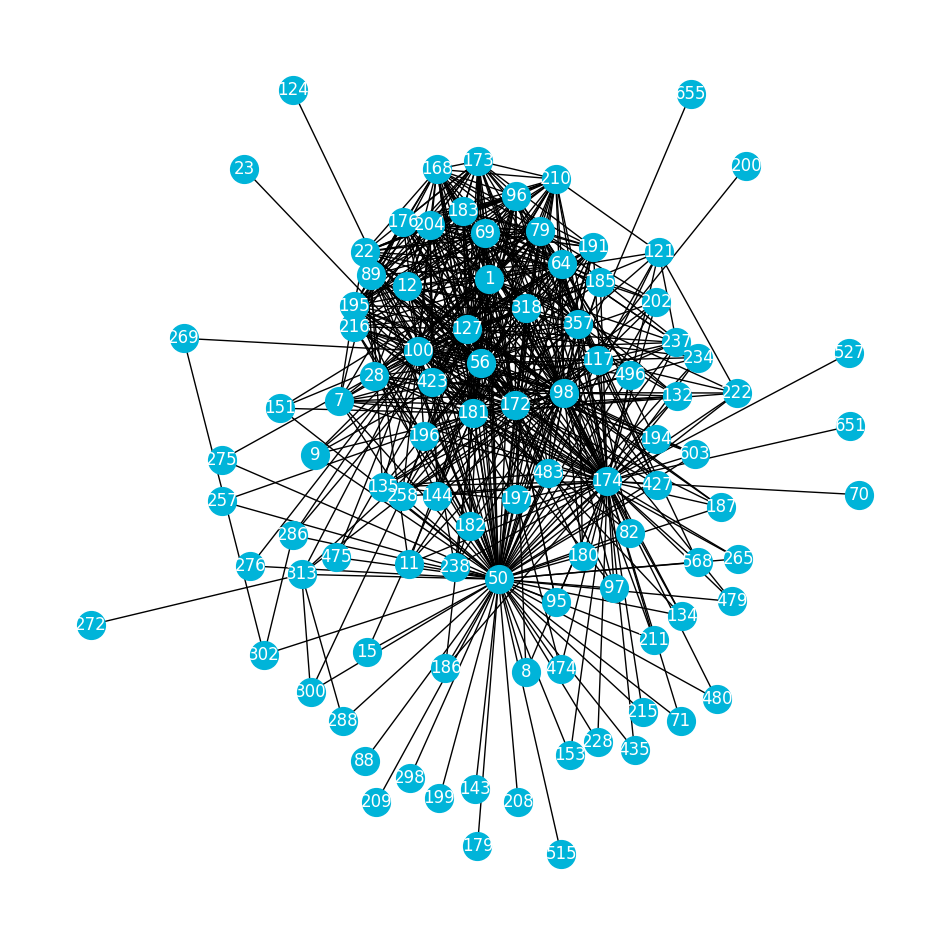

In [195]:
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(G_movie, with_labels=True, font_color='#ffffff', node_size=400, node_color="#00b4d9", pos=pos_G_movie)
plt.show()

In [ ]:
!pip install node2vec==0.4.6

In [198]:
from node2vec import Node2Vec

In [199]:
node2vec = Node2Vec(G_movie, dimensions=64, walk_length=20, num_walks=200, p=2, q=1, workers=1)

Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:06<00:00, 29.44it/s]


In [200]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [211]:
model.wv.vectors.shape

(99, 64)

## **creating a recommender function**

In [217]:
labels = movies.title.values[G_movie.nodes]



In [226]:
labels

array(['Unforgiven (1992)', 'Snow White and the Seven Dwarfs (1937)',
       'Brazil (1985)', 'Legends of the Fall (1994)', 'Patton (1970)',
       'Princess Bride, The (1987)', 'Kull the Conqueror (1997)',
       'GoodFellas (1990)', 'Sling Blade (1996)', 'Cable Guy, The (1996)',
       'GoldenEye (1995)', "What's Eating Gilbert Grape (1993)",
       'Priest (1994)', 'Dances with Wolves (1990)',
       'Mighty Aphrodite (1995)', 'M*A*S*H (1970)', 'Heavy Metal (1981)',
       'Taxi Driver (1976)', 'Terminator, The (1984)',
       'Mars Attacks! (1996)', 'Raiders of the Lost Ark (1981)',
       'Supercop (1992)', 'Hot Shots! Part Deux (1993)',
       'Raging Bull (1980)', 'Star Trek III: The Search for Spock (1984)',
       'Gone with the Wind (1939)', '2001: A Space Odyssey (1968)',
       'Much Ado About Nothing (1993)', 'Blues Brothers, The (1980)',
       'George of the Jungle (1997)', 'Army of Darkness (1993)',
       'Graduate, The (1967)', 'Richard III (1995)',
       'Full Metal

In [225]:
def recommend(movie):
    movie_id = str(movies[movies.title == movie].movie_id.values[0])
    for id in model.wv.most_similar(movie_id)[:5]:
        title = movies[movies.movie_id == int(id[0])].title.values[0]
        print(f'{title}: {id[1]:.2f}')

In [227]:
recommend('Terminator 2: Judgment Day (1991)')

Terminator, The (1984): 0.78
Monty Python and the Holy Grail (1974): 0.69
Back to the Future (1985): 0.67
Princess Bride, The (1987): 0.67
Twelve Monkeys (1995): 0.66


In [228]:
recommend('Silence of the Lambs, The (1991)')

Pulp Fiction (1994): 0.52
Shawshank Redemption, The (1994): 0.48
It's a Wonderful Life (1946): 0.47
Stand by Me (1986): 0.47
Raising Arizona (1987): 0.46


## **Thank You! ✈**